Tubes Visualisasi Data

Nama Anggota Kelompok:

1. Nurhidayah Puteri - 1301218686
2. Tamu Umbu Hunga Wohangara - 1301218692
3. Wanda Alifia - 1301218700


Repo Github: https://github.com/wandaa777/tubesvisdat
Link deploy: https://wandaa777.github.io/tubesvisdat/animated_scatter_plot.html

In [ ]:
#Import library

%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
import pandas as pd
import plotly.express as px
import seaborn as sns
mpl.style.use('ggplot')

# Eksplorasi Data

Membaca dataset

In [ ]:
data = pd.read_csv("https://raw.githubusercontent.com/nurhidayahputeri/FinalProject/main/Dataset/saham.csv")

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 829 entries, 0 to 828
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Code                829 non-null    object 
 1   Name                829 non-null    object 
 2   ListingDate         829 non-null    object 
 3   Shares              829 non-null    float64
 4   ListingBoard        829 non-null    object 
 5   Sector              829 non-null    object 
 6   LastPrice           824 non-null    float64
 7   MarketCap           824 non-null    float64
 8   MinutesFirstAdded   787 non-null    object 
 9   MinutesLastUpdated  787 non-null    object 
 10  HourlyFirstAdded    806 non-null    object 
 11  HourlyLastUpdated   806 non-null    object 
 12  DailyFirstAdded     824 non-null    object 
 13  DailyLastUpdated    824 non-null    object 
dtypes: float64(3), object(11)
memory usage: 90.8+ KB


Mengubah tipe data 'ListingDate' menjadi datetime

In [ ]:
#Menghapus NA values
df = data.dropna()

In [ ]:
df = df.drop(columns=['Shares',
                      'ListingBoard',
                      'MinutesFirstAdded',
                      'MinutesLastUpdated',
                      'HourlyFirstAdded',
                      'HourlyLastUpdated',
                      'DailyFirstAdded',
                      'DailyLastUpdated'])

In [ ]:
df = df.sort_values('ListingDate')
df.head()

,Code,Name,ListingDate,Sector,LastPrice,MarketCap
691,SMCB,Solusi Bangun Indonesia Tbk.,1977-08-10,Basic Materials,1400.0,1.262713e+13
198,CNTX,Century Textile Industry Tbk.,1979-05-22,Consumer Cyclicals,212.0,1.484000e+10
746,TFCO,Tifico Fiber Indonesia Tbk.,1980-02-26,Consumer Cyclicals,670.0,3.231461e+12
290,GDYR,Goodyear Indonesia Tbk.,1980-12-22,Consumer Cyclicals,1315.0,5.391500e+11
491,MERK,Merck Tbk.,1981-07-23,Healthcare,4700.0,2.105600e+12


In [ ]:
print('Dimensi data:', df.shape)

Dimensi data: (787, 6)


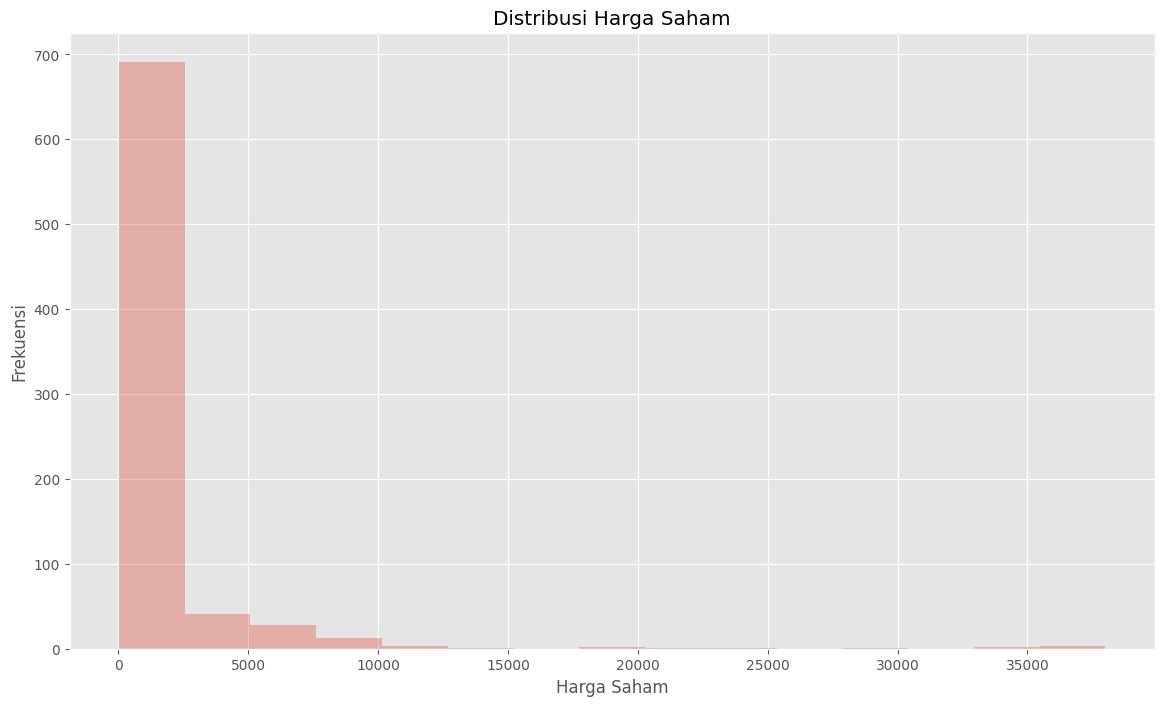

In [ ]:
df['LastPrice'].plot(kind='hist', alpha=0.35, bins=15, figsize=(14, 8))
plt.title('Distribusi Harga Saham')
plt.xlabel('Harga Saham')
plt.ylabel('Frekuensi')
plt.show();

In [ ]:
fig = px.scatter(df, x='ListingDate', y='LastPrice', color='Name',
                 size='MarketCap',
                 labels={'ListingDate':'Tanggal Pencatatan', 'LastPrice':'Harga Terakhir', 'Sector':'Sektor', 'MarketCap':'Kapitalisasi Pasar'},
                 title='Eksplorasi Data Saham')
fig.update_layout(
    title={
        'y':0.9,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'},
)
fig.show()

In [ ]:
fig.update_xaxes(
    rangeslider_visible=True,
    rangeselector=dict(
        buttons=list([
            dict(count=1, label="1m", step="month", stepmode="backward"),
            dict(count=6, label="6m", step="month", stepmode="backward"),
            dict(count=1, label="YTD", step="year", stepmode="todate"),
            dict(count=1, label="1y", step="year", stepmode="backward"),
            dict(step="all")
        ])
    )
)

DISTRIBUSI HARGA SAHAM

Perbandingan MarketCap dan Sector

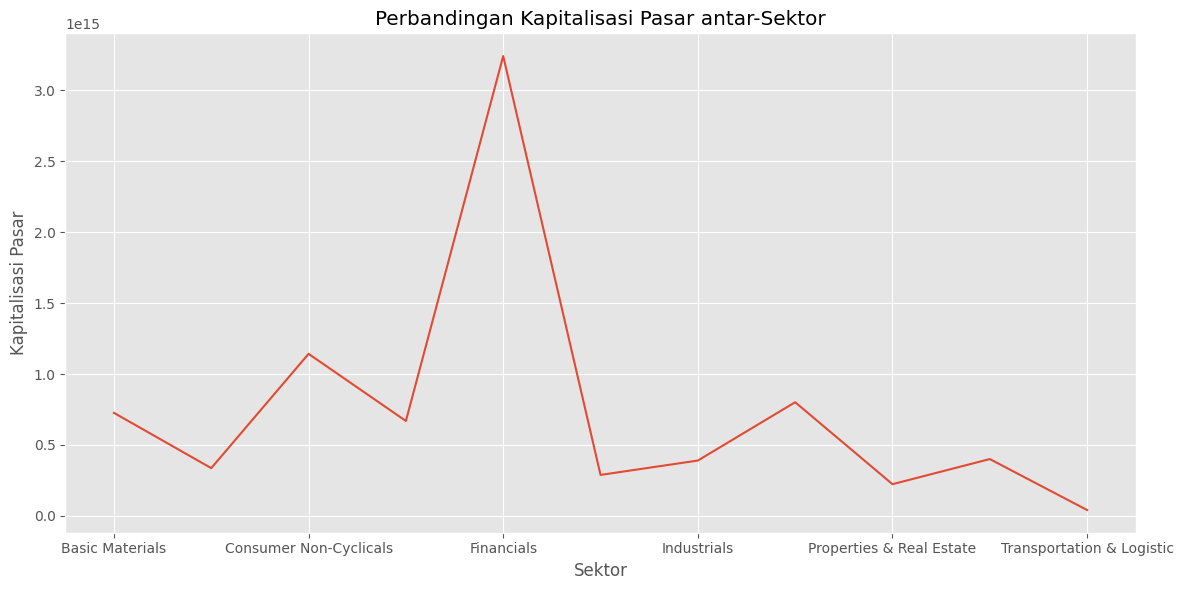

In [ ]:
fig, ax1 = plt.subplots(figsize=(12, 6))

df.groupby('Sector')['MarketCap'].sum().plot(kind='line', ax=ax1)
ax1.set_title('Perbandingan Kapitalisasi Pasar antar-Sektor')
ax1.set_xlabel('Sektor')
ax1.set_ylabel('Kapitalisasi Pasar')

plt.tight_layout()
plt.show()

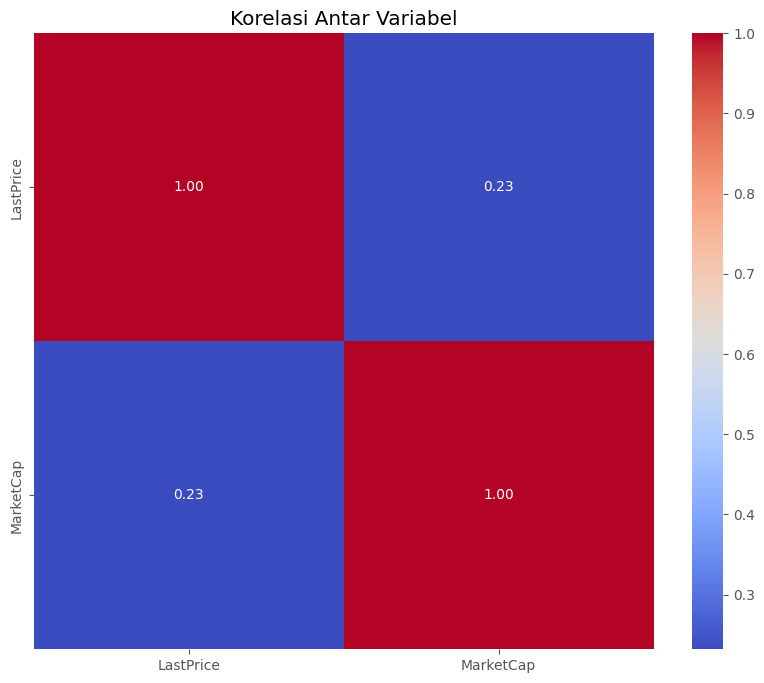

In [ ]:
correlation = df.corr(numeric_only=True)

# Membuat peta panas korelasi menggunakan Seaborn
plt.figure(figsize=(10, 8))  # Ukuran plot
sns.heatmap(correlation, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Korelasi Antar Variabel')
plt.show()

In [ ]:
# Convert 'ListingDate' to datetime
df['ListingDate'] = pd.to_datetime(df['ListingDate'])

# Extract 'YearMonth' for better readability
df['YearMonth'] = df['ListingDate'].dt.to_period('M').astype(str)

# Sort the DataFrame by 'ListingDate'
df = df.sort_values('ListingDate')

# Convert 'ListingDate' to a numeric representation for log scale
df['ListingDateNumeric'] = mdates.date2num(df['ListingDate'])

# Create an animated scatter plot
fig = px.scatter(df, x='ListingDateNumeric', y='LastPrice', color='Sector',
                 labels={'LastPrice': 'Stock Price'},
                 title='Animated Scatter Plot - Stock Prices Over Time by Sector',
                 template='plotly', opacity=0.7,
                 animation_frame='YearMonth', animation_group='Sector',
                 size="MarketCap", hover_name="Name",
                 log_x=True, size_max=55,
                 range_x=[df['ListingDateNumeric'].min(), df['ListingDateNumeric'].max()],
                 range_y=[df['LastPrice'].min(), df['LastPrice'].max()],
                 height=600, width=1000
                )

# Lines and markers on first display
fig.for_each_trace(lambda t: t.update(mode='lines+markers'))

# Lines and markers on animation frames
for fr in fig.frames:
    for d in fr.data:
        d.update(mode='markers+lines')

# Show the plot
fig.show()

In [ ]:
fig.write_html("animated_scatter_plot.html")
